# Classification on Alexa Reviews Dataset - TensorFLow

- [Kaggle Dataset](https://www.kaggle.com/sid321axn/amazon-alexa-reviews)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
data= pd.read_csv("../DATA/amazon_alexa.tsv", sep="\t")
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
data.drop(labels=["date"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   variation         3150 non-null   object
 2   verified_reviews  3150 non-null   object
 3   feedback          3150 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 98.6+ KB


In [8]:
((data.variation.value_counts() / len(data)) * 100)

Black  Dot                      16.380952
Charcoal Fabric                 13.650794
Configuration: Fire TV Stick    11.111111
Black  Plus                      8.571429
Black  Show                      8.412698
Black                            8.285714
Black  Spot                      7.650794
White  Dot                       5.841270
Heather Gray Fabric              4.984127
White  Spot                      3.460317
White                            2.888889
Sandstone Fabric                 2.857143
White  Show                      2.698413
White  Plus                      2.476190
Oak Finish                       0.444444
Walnut Finish                    0.285714
Name: variation, dtype: float64

In [9]:
((data.rating.value_counts() / len(data)) * 100)

5    72.571429
4    14.444444
1     5.111111
3     4.825397
2     3.047619
Name: rating, dtype: float64

In [10]:
((data.feedback.value_counts() / len(data)) * 100)  # IMBALANCED

1    91.84127
0     8.15873
Name: feedback, dtype: float64

## Visualization

<AxesSubplot:xlabel='feedback', ylabel='count'>

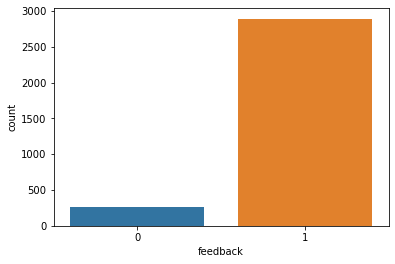

In [12]:
sns.countplot(x="feedback", data=data)

<AxesSubplot:xlabel='rating', ylabel='count'>

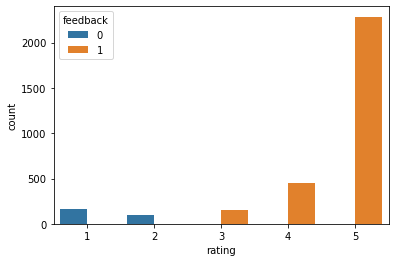

In [13]:
sns.countplot(x="rating", data=data, hue="feedback")

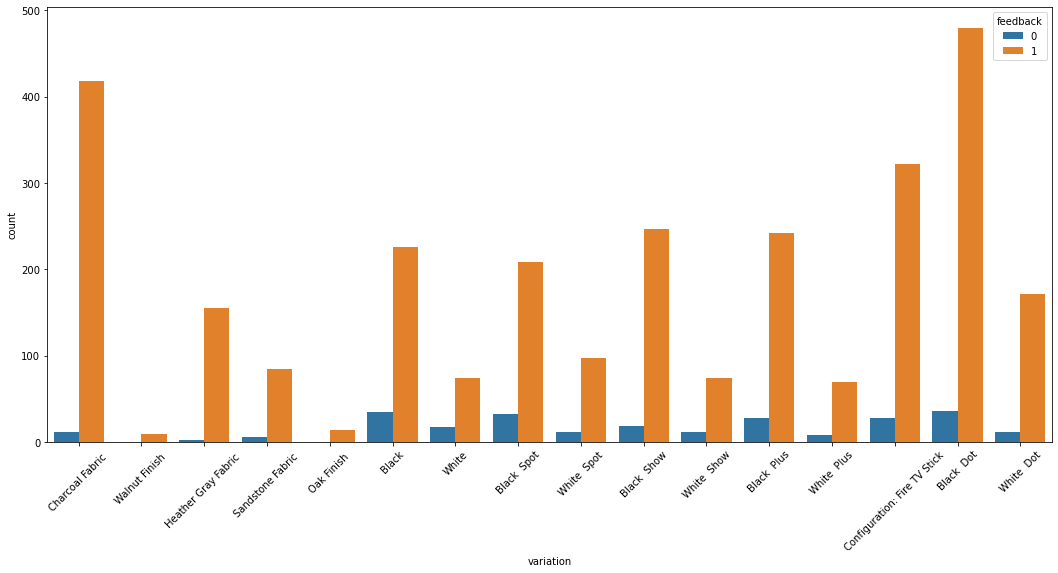

In [18]:
plt.figure(figsize=(18,8))
sns.countplot(x="variation", data=data, hue="feedback")
x=plt.xticks(rotation=45)

In [22]:
variation_dummies= pd.get_dummies(data.variation,drop_first=True,)
variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [23]:
data.drop(columns=['variation'], inplace=True)
data.columns

Index(['rating', 'verified_reviews', 'feedback'], dtype='object')

In [25]:
data=pd.concat([data, variation_dummies], axis=1)
data.head()

,rating,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,5,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Tokenizer : CountVectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
converter= CountVectorizer()

In [29]:
# Sample data
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = converter.fit_transform(sample_data)
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [31]:
converter.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [32]:
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(data['verified_reviews'])

In [36]:
vectorizer.get_feature_names()[:10]

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129']

In [38]:
alexa_countvectorizer.toarray().shape

(3150, 4044)

In [39]:
# first let's drop the column
data.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(alexa_countvectorizer.toarray())
data = pd.concat([data, reviews], axis=1)
data.head()

,rating,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data.shape

(3150, 4061)

In [41]:
x= data.drop(columns=["feedback"], axis=-1)

In [42]:
y= data.feedback

## Splitting the data

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

### Model-1

In [383]:
tf.random.set_seed(42)

model1= keras.Sequential([
    keras.layers.InputLayer(input_shape=(4060,)),
    keras.layers.Dense(units=128, activation="relu"), # input_shape=(4060,)
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dense(units=1, activation="sigmoid"),
], name="model1")

model1.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 128)               519808    
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 65        
Total params: 528,129
Trainable params: 528,129
Non-trainable params: 0
_________________________________________________________________


In [384]:
model1.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

callback1= keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=20, min_delta=0.3)
callback2= keras.callbacks.TensorBoard(log_dir="./logs")

hist1=model1.fit(x_train,y_train,epochs=30, validation_split=0.2, callbacks=[callback1, callback2])

Epoch 1/30
63/63 [==============================] - 1s 15ms/step - loss: 0.3072 - accuracy: 0.8958 - val_loss: 0.1178 - val_accuracy: 0.9464
Epoch 2/30
63/63 [==============================] - 0s 5ms/step - loss: 0.0814 - accuracy: 0.9593 - val_loss: 0.0686 - val_accuracy: 0.9663
Epoch 3/30
63/63 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.9856 - val_loss: 0.0851 - val_accuracy: 0.9702
Epoch 4/30
63/63 [==============================] - 0s 6ms/step - loss: 0.0113 - accuracy: 0.9990 - val_loss: 0.0573 - val_accuracy: 0.9802
Epoch 5/30
63/63 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0603 - val_accuracy: 0.9821
Epoch 6/30
63/63 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9861
Epoch 7/30
63/63 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9881
Epoch 8/30
63/63 [=

In [385]:
# %load_ext tensorboard
# %reload_ext tensorboard

In [386]:
# %tensorboard --logdir=logs
# http://localhost:6006/

<AxesSubplot:>

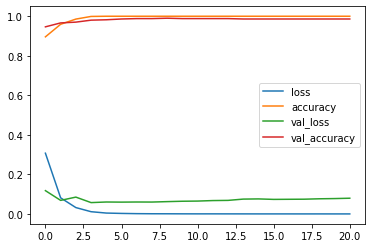

In [387]:
pd.DataFrame(hist1.history).plot()

## predicting

In [388]:
preds= (model1.predict(x_test) > 0.5).astype("int32")

# np.argmax(model.predict(x), axis=-1)  -- MultiClass Classification
# (model.predict(x) > 0.5).astype("int32")- Binary Classification

In [389]:
model1.evaluate(x_test, y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.9762


[0.13706274330615997, 0.976190447807312]

In [390]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<AxesSubplot:>

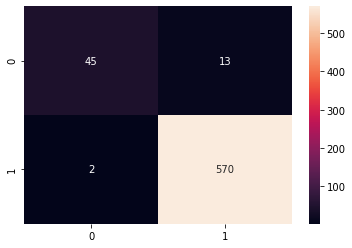

In [391]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="g")

In [392]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        58
           1       0.98      1.00      0.99       572

    accuracy                           0.98       630
   macro avg       0.97      0.89      0.92       630
weighted avg       0.98      0.98      0.98       630



In [393]:
accuracy_score(y_test, preds)

0.9761904761904762